# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização 
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



### Identificação do Aluno

#### Nome Completo

    Lucas Eduardo De Mieri

#### RA

11201723007

## Importação e preparação dos dados

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import seaborn as sns
sns.set()

In [3]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [4]:
from sklearn.datasets import load_iris

x=load_iris().data
y=load_iris().target

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

print("new x:", x_pca.shape)
print("old x:", x.shape)

x_test, X_train, y_test, y_train =tts(x_pca, y, test_size=0.2, random_state=101)

x=x_pca

new x: (150, 2)
old x: (150, 4)


## Clusterização 

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [5]:
c0=[]; c1=[]; c2=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    else:
        c2.append(X_train[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

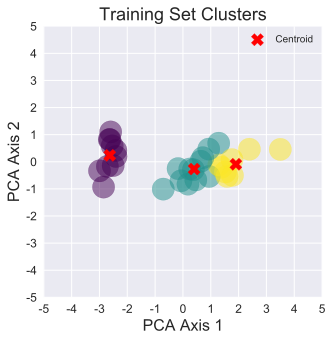

In [6]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [7]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, random_state=101).fit(x_pca)
y_pred=kmeans.predict(x_test)
print("    Predict   \n", y_pred)

    Predict   
 [2 0 2 0 2 0 0 0 0 2 1 1 1 2 0 1 2 0 1 0 0 1 0 1 0 2 0 1 1 0 1 0 2 2 0 1 0
 1 0 2 0 2 0 2 1 1 1 0 1 1 1 2 1 1 0 0 1 1 2 2 0 1 0 2 1 1 0 2 1 0 1 0 2 1
 2 0 2 2 1 2 1 0 0 1 0 1 2 0 2 1 2 2 0 0 1 1 0 0 1 0 2 2 2 0 1 2 1 2 0 2 2
 1 2 0 0 0 0 0 1 0]


Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [8]:
print("    centroids: \n", kmeans.cluster_centers_, "\n")

    centroids: 
 [[ 0.66443351 -0.33029221]
 [-2.64084076  0.19051995]
 [ 2.34645113  0.27235455]] 



Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [9]:
print("    inércia: \n", kmeans.inertia_, "\n")

    inércia: 
 63.87383806036226 



Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

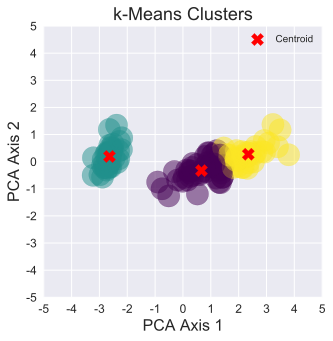

In [10]:
plt.figure()
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=y_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [11]:
from sklearn.cluster import AffinityPropagation

AFP=AffinityPropagation().fit(x_pca)


Mostre os centróides dos grupos.

In [12]:
AFP.cluster_centers_

array([[-2.78743398, -0.22774019],
       [-2.53757337,  0.51036755],
       [ 1.04329778,  0.22895691],
       [-0.19188449, -0.67749054],
       [ 1.37873698, -0.42120514],
       [ 0.35553304, -0.50321849],
       [ 3.07652162,  0.68576444],
       [ 2.14498686,  0.13890661]])

Mostre os índices dos grupos.

In [14]:
AFP.cluster_centers_indices_

array([ 12,  46,  58,  81,  83,  94, 135, 136], dtype=int64)

In [70]:
AFP.labels_

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 2, 2, 2, 5, 2, 5, 2, 3, 2, 3, 3, 5, 5, 2, 3, 2,
       5, 5, 4, 3, 2, 5, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 5, 4, 5, 2, 2, 5,
       5, 5, 5, 2, 5, 3, 5, 5, 5, 2, 3, 5, 7, 4, 7, 7, 7, 6, 5, 6, 7, 6,
       7, 4, 7, 4, 4, 7, 7, 6, 6, 4, 7, 4, 6, 4, 7, 6, 4, 4, 7, 7, 6, 6,
       7, 4, 4, 6, 7, 7, 4, 7, 7, 7, 4, 7, 7, 7, 4, 7, 7, 4], dtype=int64)

Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [16]:
y_pred_ap=AFP.predict(x_test)
AFP.predict(x_test)

array([7, 5, 7, 5, 7, 5, 2, 5, 5, 6, 1, 0, 0, 2, 5, 0, 7, 5, 0, 3, 3, 1,
       4, 1, 3, 7, 5, 0, 1, 2, 0, 2, 6, 7, 5, 1, 2, 0, 4, 7, 2, 7, 2, 7,
       0, 0, 0, 2, 0, 1, 1, 6, 1, 1, 4, 4, 0, 0, 6, 6, 4, 0, 3, 7, 1, 0,
       4, 7, 1, 5, 1, 5, 6, 0, 7, 2, 2, 7, 1, 7, 1, 5, 4, 1, 5, 0, 7, 2,
       6, 1, 7, 6, 4, 2, 1, 1, 4, 4, 1, 3, 6, 7, 4, 4, 0, 7, 1, 7, 3, 7,
       7, 1, 7, 2, 5, 2, 2, 3, 0, 5], dtype=int64)

Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

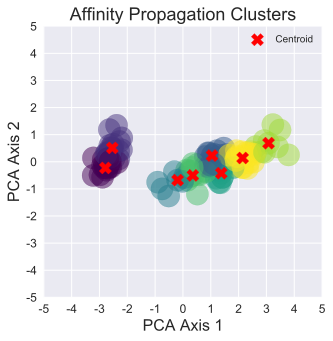

In [17]:
plt.figure()
plt.scatter(x=x_test[:, 0], y=x_test[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=AFP.cluster_centers_[:,0], y=AFP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Aplicação - Compressão de Imagem

Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [52]:
import matplotlib.image as mping
from random import randint

dic= ['arara.jpg', 'tiger.jpg', 'pencils.jpg', 'fish.jpg', 'bird.jpg']
n_cores=7
for i in range(4):
    IMG=plt.imread(dic[i])
    IMG=np.array(IMG, dtype=np.float64)/255
    print("image:", dic[i], "shape:", IMG.shape)
print("numero de cores:", n_cores)


image: arara.jpg shape: (600, 800, 3)
image: tiger.jpg shape: (1200, 1920, 3)
image: pencils.jpg shape: (853, 1280, 3)
image: fish.jpg shape: (1786, 2176, 3)
numero de cores: 7


Exiba a imagem

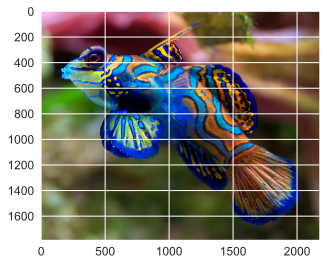

In [53]:
plt.imshow(IMG)

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [72]:
w, h, d= IMG.shape
IMG_modify= IMG.reshape(w*h,d)
IMG_modify.shape



(3886336, 3)

Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [60]:
%%time
x = shuffle(IMG_modify)[:1000]
kmeans=KMeans(n_clusters= n_cores).fit(x)

Wall time: 437 ms


Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [66]:
grupos=kmeans.predict(IMG_modify)

Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [67]:
codebook_random=shuffle(IMG_modify)[:n_cores]
random_group=pairwise_distances_argmin(codebook_random, IMG_modify, axis=0)

In [68]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((w, h, d))
    grupo_idx = 0
    for i in range(w):
        for j in range(h):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

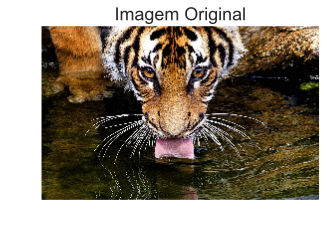

In [69]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(imagem)

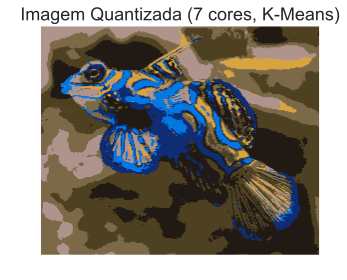

In [73]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

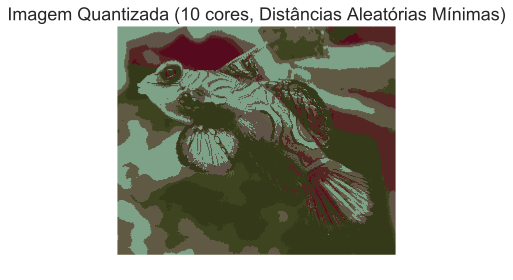

In [75]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, Distâncias Aleatórias Mínimas)' % nCores)
plt.imshow(recria_imagem(codebook_random, random_group, w, h))